In [73]:
import numpy as np
import seaborn as sns
import scipy as sp
sns.set_style('white')
sns.set_context('notebook', font_scale=1.33)
sns.set()

import import_ipynb

import matplotlib.pyplot as pl

from pandas import read_csv

1. import data set
2. clean data set 
3. exploratory

### 1. Import Data set 

In [74]:
data = read_csv("data.csv")

### 2. Clean data set 

#### Reindex participant ids

In [75]:
id_to_index = {}
i = 0

for name in data['subject'].unique():
    id_to_index[name] = i
    i += 1

data['subject'] = data['subject'].apply(lambda x: id_to_index[x])

num_participants = i

In [76]:
## DO NOT CHANGE THE CODE BELOW. If you do, you must go and change all HARDCODED_COLUMN_NUMBERS below 
data = data.drop(columns = ['task_version', 'screen_resolution', 'browser_interactions', 'key_press']);

In [77]:
data.head()
print(num_participants)

100


#### Mapping context to represetative values in data set

In [78]:
risky_20 = 0.0
risky_35 = 1.0
risky_50_vs_20 = 2.0 
risky_50_vs_80 = 3.0 
risky_65 = 4.0 
risky_80 = 5.0 

num_contexts = 6

CHOICE_RISKY = 1.0
CHOICE_SURE = 0.0 

### 3. Exploratory 

In [79]:
def percent_risky_by_context(participant, context):
    
    num_trials = len(data[(data['subject'] == participant) & (data['context'] == context)])
    num_risky = len(data[(data['subject'] == participant) & (data['context'] == context) & (data['choice'] == CHOICE_RISKY)])
    return num_risky/num_trials

    

In [80]:
len(data[(data['subject'] == 1)])

150

Text(0.5, 1.0, 'Percentage of times risky option chosen by context')

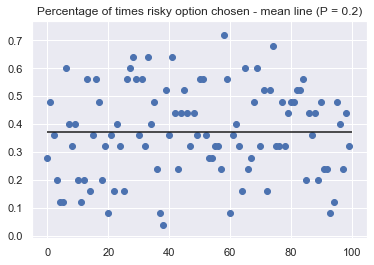

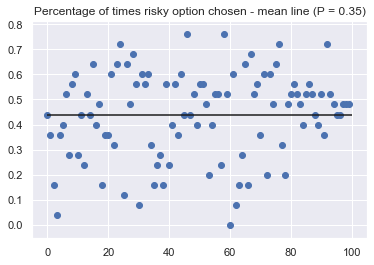

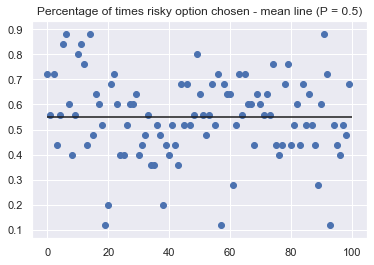

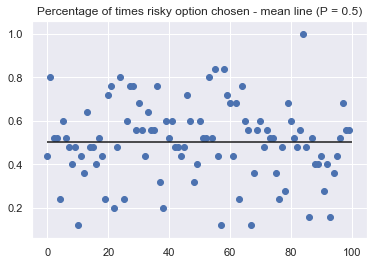

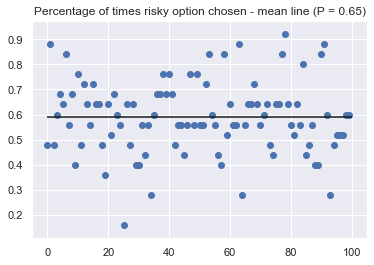

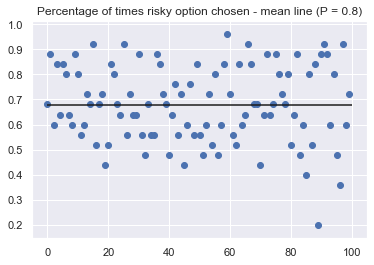

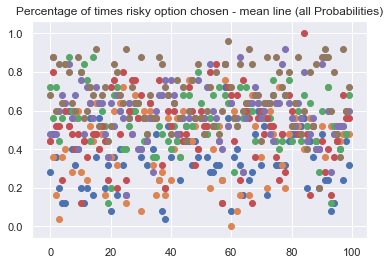

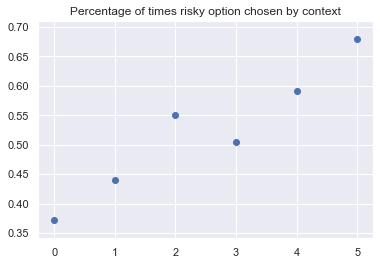

In [81]:
sure_points =  np.array([0, 2, 3, 4, 5, 6, 7, 8, 10]); 
p_risky_by_c = np.ndarray([num_participants, num_contexts])
c_mapping = {0: "P = 0.2", 1: "P = 0.35", 2: "P = 0.5", 3: "P = 0.5", 4: "P = 0.65", 5: "P = 0.8"}

for p in range(num_participants):
    for c in range(0, num_contexts):
            p_risky_by_c[p][c] = percent_risky_by_context(p, c);
            

for c in range(0, num_contexts): 
    pl.figure()
    pl.scatter(range(num_participants), p_risky_by_c[:,c])
    pl.hlines(np.mean(p_risky_by_c[:, c],0), 0, 100)
    pl.title("Percentage of times risky option chosen - mean line (" + c_mapping[c] + ")")

pl.figure()
for c in range(0, num_contexts): 
    pl.scatter(range(num_participants), p_risky_by_c[:,c])
    pl.title("Percentage of times risky option chosen - mean line (all Probabilities)")
    
pl.figure()

pl.scatter(range(num_contexts), np.mean(p_risky_by_c, 0));
pl.title("Percentage of times risky option chosen by context") 

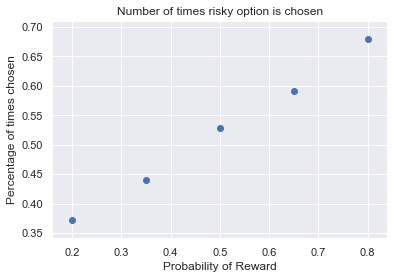

In [82]:
p_risky_chosen = {}
for p in [0.2,0.35, 0.5, 0.65, 0.8]:
    times_chosen = len(data[(data['choice'] == CHOICE_RISKY) & (data['probability']==p)])
    times_offered = len(data[data['probability']==p])
    percentage = times_chosen/times_offered
    p_risky_chosen[p] = percentage; 

pl.scatter(list(p_risky_chosen.keys()), list(p_risky_chosen.values()))
pl.title("Number of times risky option is chosen")
pl.xlabel("Probability of Reward")
pl.ylabel("Percentage of times chosen");
#line = {0.1:0.1, 0.5: 0.5, 0.9:0.9}
#pl.plot(list(line.keys()), list(line.values()))

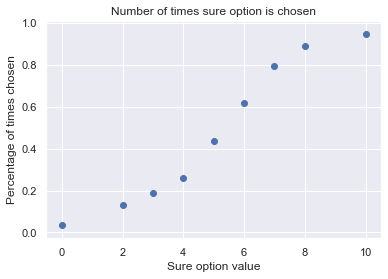

In [83]:
p_sure_chosen = {}
for s in [0, 2, 3, 4, 5, 6, 7, 8, 10]:
    times_chosen = len(data[(data['choice'] == CHOICE_SURE) & (data['certain_points']==s)])
    times_offered = len(data[data['certain_points']==s])
    percentage = times_chosen/times_offered
    p_sure_chosen[s] = percentage; 
    
pl.scatter(list(p_sure_chosen.keys()), list(p_sure_chosen.values()))
pl.title("Number of times sure option is chosen")
pl.xlabel("Sure option value")
pl.ylabel("Percentage of times chosen");

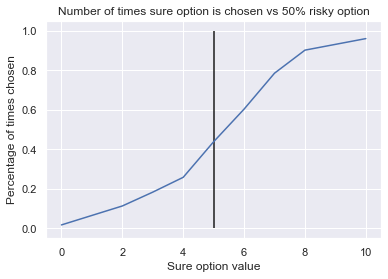

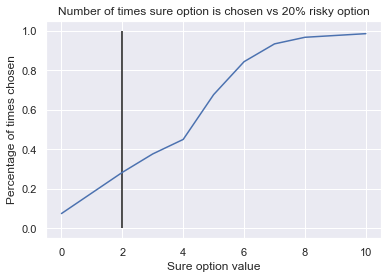

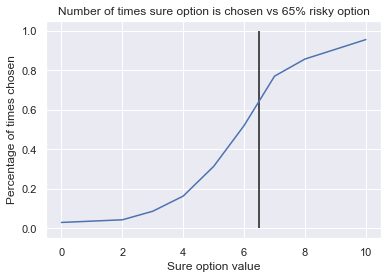

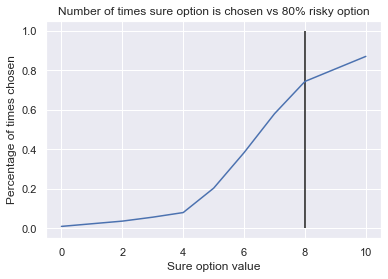

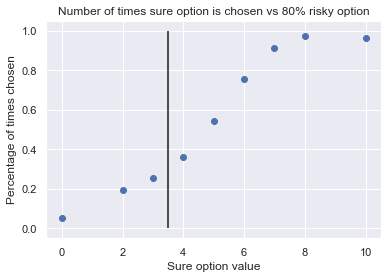

In [84]:
sure_chosen_vs_5 = {}

for s in [0, 2, 3, 4, 5, 6, 7, 8, 10]:
    times_chosen = len(data[(data['choice'] == CHOICE_SURE) & (data['certain_points']==s) & (data['probability']==0.5)])
    times_offered = len(data[(data['certain_points']==s) & (data['probability']==0.5)])
    percentage = times_chosen/times_offered
    sure_chosen_vs_5[s] = percentage; 
    
pl.plot(list(sure_chosen_vs_5.keys()), list(sure_chosen_vs_5.values()))
pl.title("Number of times sure option is chosen vs 50% risky option")
pl.xlabel("Sure option value")
pl.ylabel("Percentage of times chosen")
pl.vlines(5, 0, 1)

sure_chosen_vs_2 = {}

for s in [0, 2, 3, 4, 5, 6, 7, 8, 10]:
    times_chosen = len(data[(data['choice'] == CHOICE_SURE) & (data['certain_points']==s) & (data['probability']==0.2)])
    times_offered = len(data[(data['certain_points']==s) & (data['probability']==0.2)])
    percentage = times_chosen/times_offered
    sure_chosen_vs_2[s] = percentage; 

pl.figure()
pl.plot(list(sure_chosen_vs_2.keys()), list(sure_chosen_vs_2.values()))
pl.title("Number of times sure option is chosen vs 20% risky option")
pl.xlabel("Sure option value")
pl.ylabel("Percentage of times chosen")
pl.vlines(2, 0, 1)

sure_chosen_vs_65 = {}

for s in [0, 2, 3, 4, 5, 6, 7, 8, 10]:
    times_chosen = len(data[(data['choice'] == CHOICE_SURE) & (data['certain_points']==s) & (data['probability']==0.65)])
    times_offered = len(data[(data['certain_points']==s) & (data['probability']==0.65)])
    percentage = times_chosen/times_offered
    sure_chosen_vs_65[s] = percentage; 

pl.figure()
pl.plot(list(sure_chosen_vs_65.keys()), list(sure_chosen_vs_65.values()))
pl.title("Number of times sure option is chosen vs 65% risky option")
pl.xlabel("Sure option value")
pl.ylabel("Percentage of times chosen")
pl.vlines(6.5, 0, 1)

sure_chosen_vs_8 = {}

for s in [0, 2, 3, 4, 5, 6, 7, 8, 10]:
    times_chosen = len(data[(data['choice'] == CHOICE_SURE) & (data['certain_points']==s) & (data['probability']==0.8)])
    times_offered = len(data[(data['certain_points']==s) & (data['probability']==0.8)])
    percentage = times_chosen/times_offered
    sure_chosen_vs_8[s] = percentage; 

pl.figure()
pl.plot(list(sure_chosen_vs_8.keys()), list(sure_chosen_vs_8.values()))
pl.title("Number of times sure option is chosen vs 80% risky option")
pl.xlabel("Sure option value")
pl.ylabel("Percentage of times chosen")
pl.vlines(8, 0, 1)

sure_chosen_vs_35 = {}

for s in [0, 2, 3, 4, 5, 6, 7, 8, 10]:
    times_chosen = len(data[(data['choice'] == CHOICE_SURE) & (data['certain_points']==s) & (data['probability']==0.35)])
    times_offered = len(data[(data['certain_points']==s) & (data['probability']==0.35)])
    percentage = times_chosen/times_offered
    sure_chosen_vs_35[s] = percentage; 

pl.figure()
pl.scatter(list(sure_chosen_vs_35.keys()), list(sure_chosen_vs_35.values()))
pl.title("Number of times sure option is chosen vs 80% risky option")
pl.xlabel("Sure option value")
pl.ylabel("Percentage of times chosen")
pl.vlines(3.5, 0, 1);

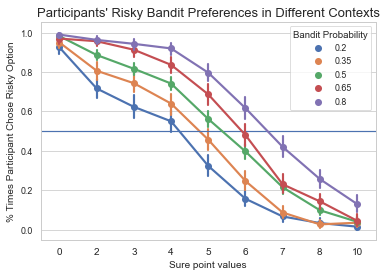

In [85]:
# Fig A
sns.set_style("whitegrid")
sns.set_context("paper")
ax = sns.pointplot(x = "certain_points", y = "choice", hue = "probability", data=data)
ax.axhline(0.5)
pl.xlabel("Sure point values", fontsize = 10)
pl.ylabel("% Times Participant Chose Risky Option", fontsize = 10)
pl.title("Participants' Risky Bandit Preferences in Different Contexts", fontsize = 13);
ax.legend(title = "Bandit Probability")
# change labels based on what keywords i'm using in the writeup
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 10)

pl.savefig('A.png', dpi = 300)

In [86]:
# Bernoulli test of risk-seeking bias 

risky_50 = len(data[(data['probability'] == 0.5) & (data['certain_points'] == 5)& (data['choice'] == 1)])
sum_50 = len(data[(data['probability'] == 0.5) & (data['certain_points'] == 5)])
print("Probability of observed # 50% risky choices vs 5-point cards): ", sp.stats.binom_test(x = risky_50, n = sum_50, p = 0.5))

risky_20 = len(data[(data['probability'] == 0.2) & (data['certain_points'] == 2)& (data['choice'] == 1)])
sum_20 = len(data[(data['probability'] == 0.2) & (data['certain_points'] == 2)])
print("Probability of observed # 20% risky choices vs 2-point cards): ", sp.stats.binom_test(x = risky_20, n = sum_20, p = 0.5))

risky_80 = len(data[(data['probability'] == 0.8) & (data['certain_points'] == 8)& (data['choice'] == 1)])
sum_80 = len(data[(data['probability'] == 0.8) & (data['certain_points'] == 8)])
print("Probability of observed # 80% risky choices vs 8-point cards): ", sp.stats.binom_test(x = risky_80, n = sum_80, p = 0.5))


Probability of observed # 50% risky choices vs 5-point cards):  0.002849793935251586
Probability of observed # 20% risky choices vs 2-point cards):  3.7663421723211645e-14
Probability of observed # 80% risky choices vs 8-point cards):  1.2563965932123718e-17


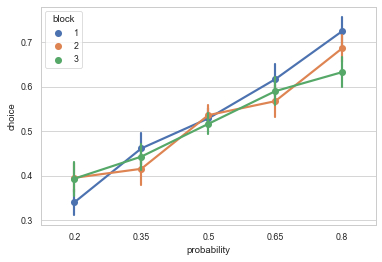

In [87]:
ax = sns.pointplot(x = "probability", y = "choice", hue = "block", data=data)

In [88]:
gb = data.groupby(['subject', 'probability']).choice.mean().reset_index()

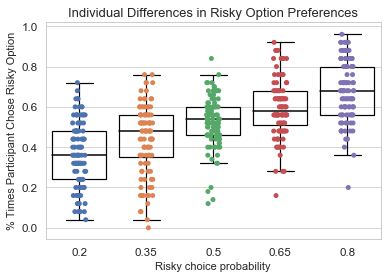

In [89]:
# Fig B 
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black', 'linewidth':'1.5'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 1.33)
sns.stripplot(x='probability', y = 'choice', data=gb)
sns.boxplot(x='probability', y = 'choice', data=gb, **PROPS, showfliers = False)
pl.xlabel("Risky choice probability", fontsize = 11)
pl.ylabel("% Times Participant Chose Risky Option", fontsize = 11)
pl.title("Individual Differences in Risky Option Preferences", fontsize = 13);
# change labels based on what keywords i'm using in the writeup

pl.savefig('B.png', dpi = 300)

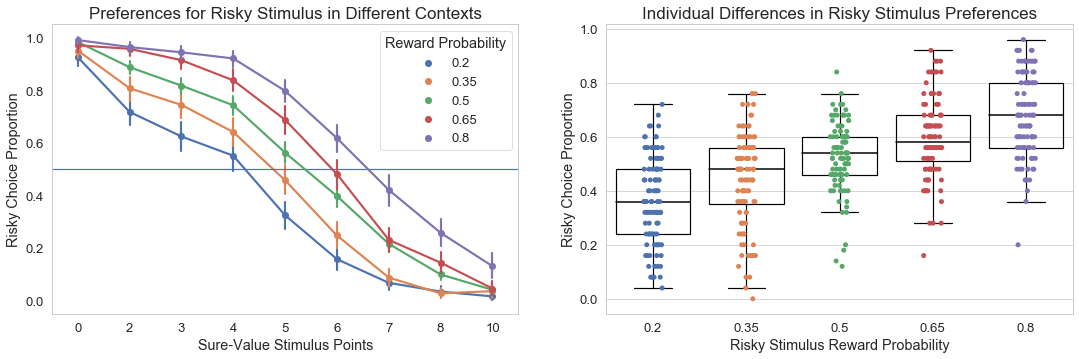

In [94]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 1.5)
fig, axs = pl.subplots(1,2, figsize=(16, 6))

sns.pointplot(x = "certain_points", y = "choice", hue = "probability", data=data, ax = axs[0])
axs[0].axhline(0.5)
axs[0].set_xlabel("Sure-Value Stimulus Points")
axs[0].set_ylabel("Risky Choice Proportion")
axs[0].set_title("Preferences for Risky Stimulus in Different Contexts", fontsize = 17);
axs[0].legend(title = "Reward Probability")

axs[0].grid(False)

sns.stripplot(x='probability', y = 'choice', data=gb, ax = axs[1])
sns.boxplot(x='probability', y = 'choice', data=gb, **PROPS, showfliers = False, ax = axs[1])
axs[1].set_xlabel("Risky Stimulus Reward Probability")
axs[1].set_ylabel("Risky Choice Proportion")
axs[1].set_title("Individual Differences in Risky Stimulus Preferences", fontsize = 17);

pl.tight_layout(pad=3.0)

pl.savefig('BC.png', dpi = 300)

In [91]:
# next few cells explore how the average value of risky bandit is dif for each participant due to 
# random point selection

agg = {"card_points": "mean", "choice": "mean"}
gb = data.groupby(['subject', 'probability']).agg(agg).reset_index()
gb['card_points'] /= 10 
gb

,subject,probability,card_points,choice
0,0,0.20,0.12,0.28
1,0,0.35,0.36,0.44
2,0,0.50,0.62,0.58
3,0,0.65,0.64,0.48
4,0,0.80,0.84,0.68
...,...,...,...,...
495,99,0.20,0.28,0.32
496,99,0.35,0.20,0.48
497,99,0.50,0.54,0.62
498,99,0.65,0.68,0.60


In [92]:
gb2 = data.groupby(['probability']).agg(agg).reset_index()
gb2['card_points'] /=10
gb2

,probability,card_points,choice
0,0.20,0.2036,0.3716
1,0.35,0.3448,0.4396
2,0.50,0.5022,0.5278
3,0.65,0.6384,0.5908
4,0.80,0.8072,0.6796


In [26]:
gb.corr()
# notice how choice is more correlated with avg value of card_points that participant receives vs. underlying probability

,subject,probability,card_points,choice
subject,1.000000,0.000000,0.010597,0.018167
probability,0.000000,1.000000,0.927776,0.583557
card_points,0.010597,0.927776,1.000000,0.627637
choice,0.018167,0.583557,0.627637,1.000000


In [27]:
# fig, axes = pl.subplots(1,2,figsize=(12,4))
# ax = sns.pointplot(x = "certain_points", y = "choice", hue = "probability", data=data, ax=axes[0])

In [28]:
#sns.pointplot(x=, y=…, data=data, ax=ax)
#sns.pointplot(x=…, y=…, data=data, ax=ax)

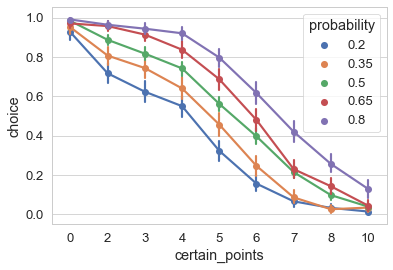

In [29]:
ax = sns.pointplot(x = "certain_points", y = "choice", hue = "probability", data=data)